### load

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

iris = datasets.load_iris()

# Prepare input features and labels
X = iris.data[:, 2:]  # using petal length and petal width as features
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [2]:
k_values = range(2, 10)
best_k = 0
best_inertia = float('inf')

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia = kmeans.inertia_

    if inertia < best_inertia:
        best_k = k
        best_inertia = inertia
        best_centroids = kmeans.cluster_centers_

print("Best K: ", best_k)
print("Best Inertia: ", best_inertia)
print("Best Centroids: ", best_centroids)

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Best K:  9
Best Inertia:  6.456494541406307
Best Centroids:  [[5.26       2.17      ]
 [1.462      0.246     ]
 [4.06666667 1.24444444]
 [5.79230769 2.3       ]
 [3.41428571 1.05714286]
 [4.96470588 1.75294118]
 [4.55714286 1.43333333]
 [5.7375     1.7375    ]
 [6.6        2.06666667]]


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

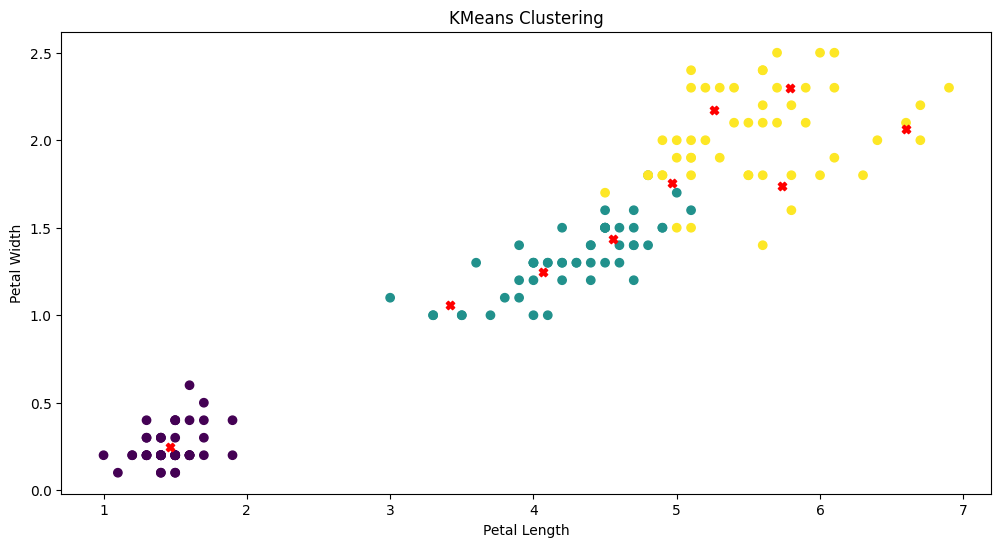

In [3]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='X')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KMeans Clustering')
plt.show()

In [5]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
print("DBSCAN best result: ", dbscan.labels_)

DBSCAN best result:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


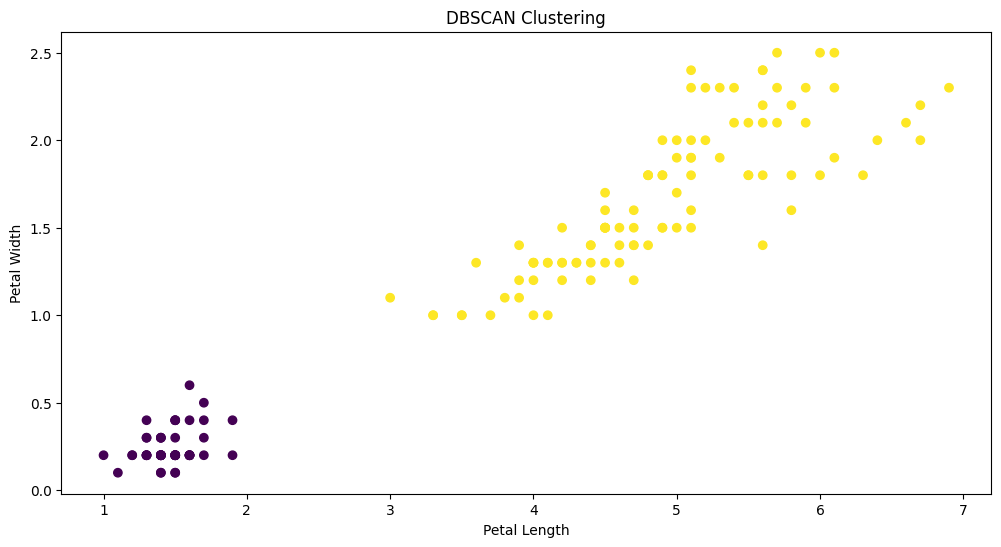

In [6]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('DBSCAN Clustering')
plt.show()

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans best K:  3
KMeans centroids:  [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
DBSCAN best result:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]


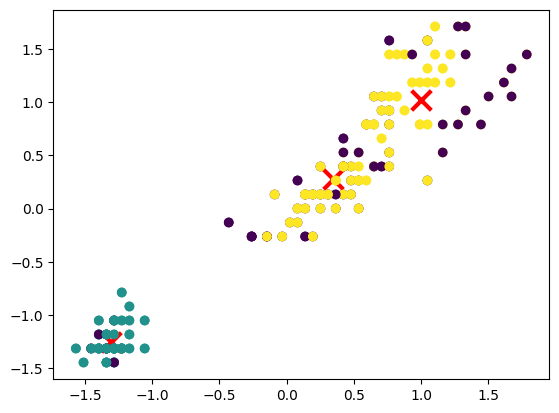

In [7]:
# Load the Iris dataset
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
iris = load_iris()

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print("KMeans best K: ", kmeans.n_clusters)
print("KMeans centroids: ", kmeans.cluster_centers_)

# Plotting clusters and centroids
plt.scatter(X[:, 2], X[:, 3], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[
            :, 3], marker='x', s=200, linewidths=3, color='r')

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
print("DBSCAN best result: ", dbscan.labels_)

# Plot best result using same axes as KMeans
plt.scatter(X[:, 2], X[:, 3], c=dbscan.labels_)
plt.show()

# Compare results
# KMeans did better